In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from scipy import signal
import matplotlib
import matplotlib.pyplot as plt
import spectrum
import signals
import converters

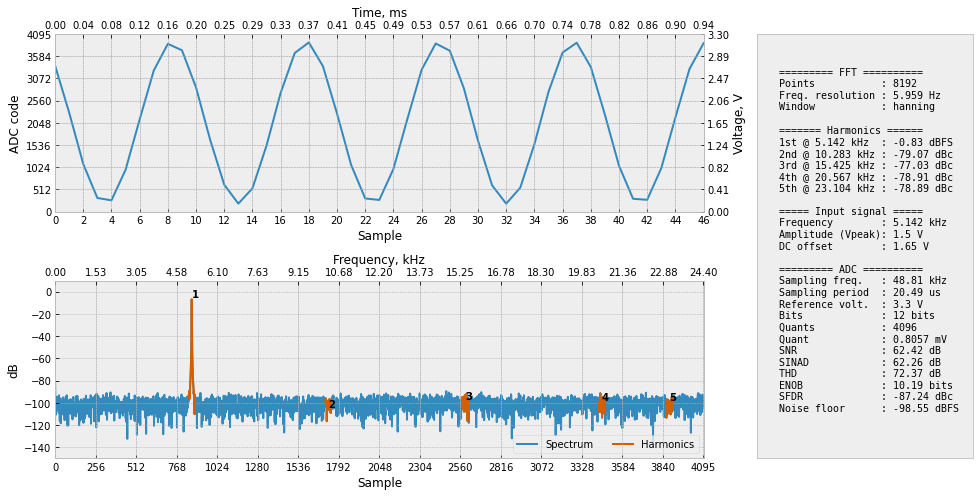

In [4]:
# ADC parameters
adc_freq = 48.813e3
adc_buff_n = 8192
adc_bits = 12
adc_quants = 2 ** adc_bits
adc_vref = 3.3
adc_quant_v = adc_vref / adc_quants

# input signal parameters
sig_points = adc_buff_n
sig_vpeak_max = adc_vref / 2
sig_vpeak = 1.5
assert sig_vpeak <= sig_vpeak_max  
sig_voffset = adc_vref / 2
sig_freq = 5.143e3
np.random.seed(42)  # for reproducible results
sig_ph0 = np.random.uniform(0, 2 * np.pi)
sig_f = lambda t: signals.sin(t, peak=sig_vpeak, offset=sig_voffset, freq=sig_freq, ph0=sig_ph0)

# Analog to digital conversion
sig_sampled = converters.analog2digital(sig_f=sig_f,
                                        sample_freq=adc_freq,
                                        sample_n=sig_points,
                                        sample_bits=adc_bits,
                                        vref=adc_vref,
                                        noisy_lsb=2)

# Analyze spectrum and show plots
spectrum.analyze(sig_sampled, adc_bits, adc_vref, adc_freq, window='hanning')